In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score


path = kagglehub.dataset_download("patelris/crop-yield-prediction-dataset")
df = pd.read_csv(path + '/yield_df.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB
None


In [157]:
# area_count = df['Area'].value_counts()
# valid_areas = area_count[area_count >= 100].index
# df = df[df['Area'].isin(valid_areas)]
# print(df['Area'].value_counts())
# print(df['Area'].unique().size)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

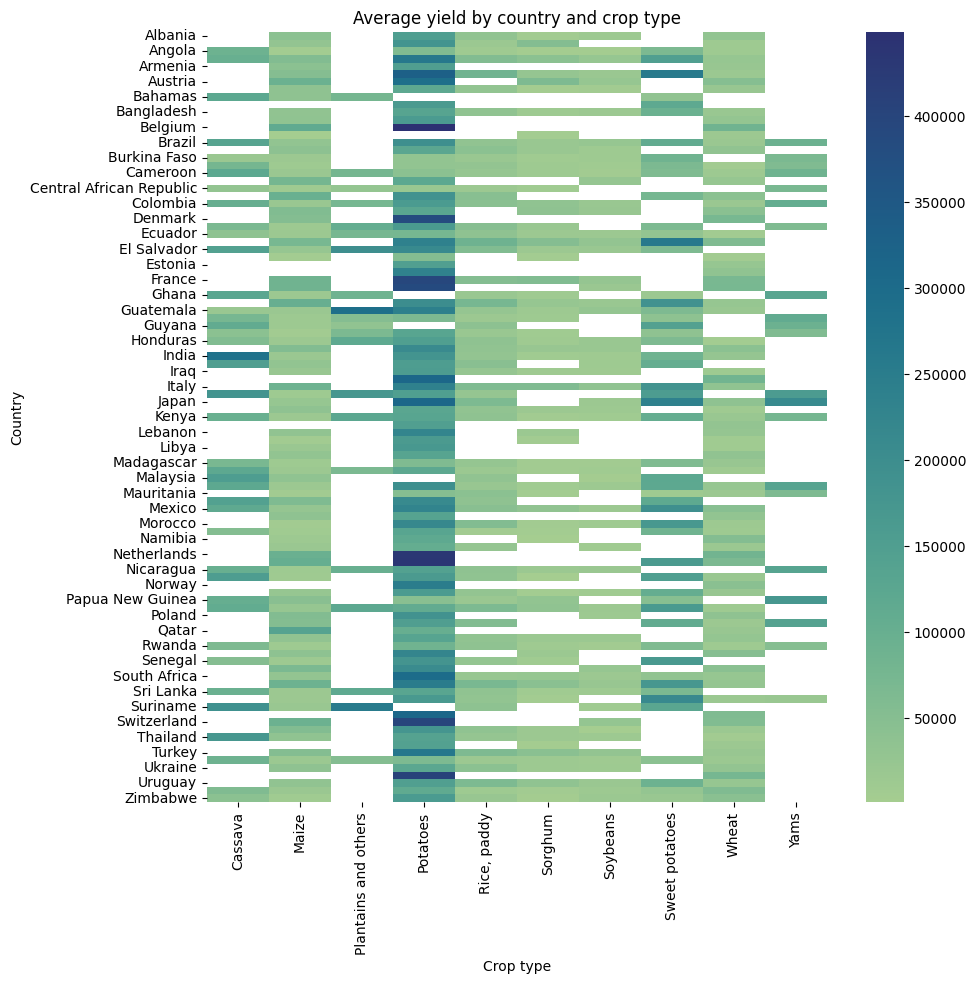

In [158]:
pivot_country_item = df.pivot_table(
    values='hg/ha_yield', index='Area', columns='Item', aggfunc='mean')
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_country_item, annot=False, cmap='crest')
plt.title('Average yield by country and crop type')
plt.xlabel('Crop type')
plt.ylabel('Country')
plt.show()

In [159]:
correlation_by_crop = df.groupby('Item')[
    ['average_rain_fall_mm_per_year', 'avg_temp', 'pesticides_tonnes', 'hg/ha_yield']].corr().round(3)
correlation_by_crop

average_rain_fall_mm_per_year  \
Item                                                                                
Cassava              average_rain_fall_mm_per_year                          1.000   
                     avg_temp                                               0.182   
                     pesticides_tonnes                                      0.021   
                     hg/ha_yield                                           -0.193   
Maize                average_rain_fall_mm_per_year                          1.000   
                     avg_temp                                               0.333   
                     pesticides_tonnes                                      0.164   
                     hg/ha_yield                                           -0.179   
Plantains and others average_rain_fall_mm_per_year                          1.000   
                     avg_temp                                               0.136   
                     pesticides_tonnes                                      0.616   
                     hg/ha_yield                                            0.056   
Potatoes             average_rain_fall_mm_per_year                          1.000   
                     avg_temp                                               0.281   
                     pesticides_tonnes                                      0.191   
                     hg/ha_yield                                           -0.125   
Rice, paddy          average_rain_fall_mm_per_year                          1.000   
                     avg_temp                                               0.345   
                     pesticides_tonnes                                      0.139   
                     hg/ha_yield                                           -0.133   
Sorghum              average_rain_fall_mm_per_year                          1.000   
                     avg_temp                                               0.298   
                     pesticides_tonnes                                      0.270   
                     hg/ha_yield                                           -0.029   
Soybeans             average_rain_fall_mm_per_year                          1.000   
                     avg_temp                                               0.383   
                     pesticides_tonnes                                      0.179   
                     hg/ha_yield                                           -0.026   
Sweet potatoes       average_rain_fall_mm_per_year                          1.000   
                     avg_temp                                               0.210   
                     pesticides_tonnes                                      0.110   
                     hg/ha_yield                                           -0.223   
Wheat                average_rain_fall_mm_per_year                          1.000   
                     avg_temp                                               0.165   
                     pesticides_tonnes                                      0.340   
                     hg/ha_yield                                           -0.068   
Yams                 average_rain_fall_mm_per_year                          1.000   
                     avg_temp                                               0.033   
                     pesticides_tonnes                                      0.175   
                     hg/ha_yield                                            0.207   

                                                    avg_temp  \
Item                                                           
Cassava              average_rain_fall_mm_per_year     0.182   
                     avg_temp                          1.000   
                     pesticides_tonnes                -0.152   
                     hg/ha_yield                       0.354   
Maize                average_rain_fall_mm_per_year     0.333   
                     avg_temp    

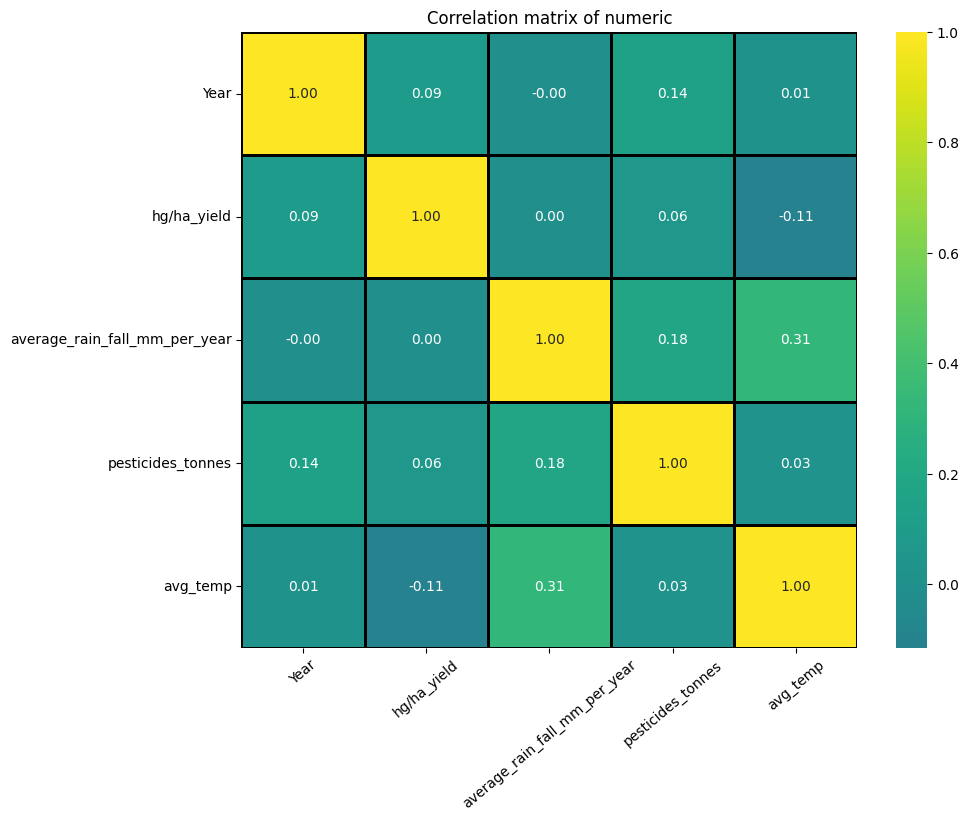

In [160]:
df_corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, center=0, linewidths=2,
            linecolor='black', square=True, fmt='.2f', cmap='viridis')
plt.title('Correlation matrix of numeric')
plt.xticks(rotation=40, )
plt.show()

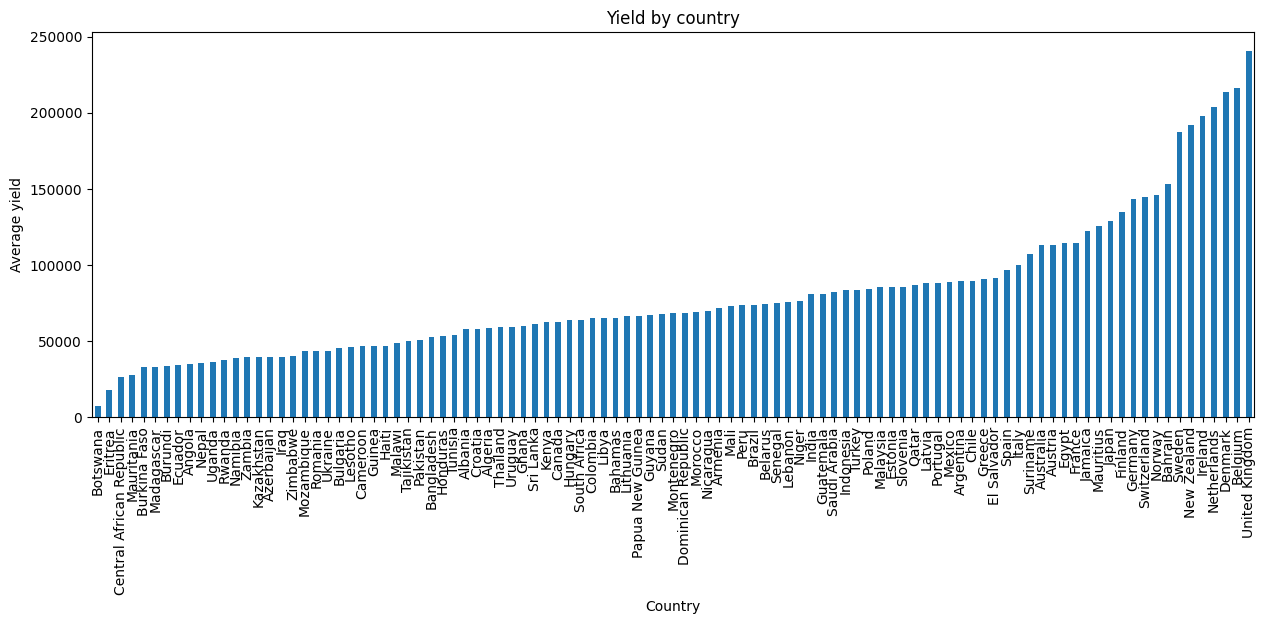

In [161]:
df.groupby('Area')[
    'hg/ha_yield'].mean().sort_values().plot(kind='bar', figsize=(15, 5))
plt.title('Yield by country')
plt.xlabel('Country')
plt.ylabel('Average yield')
plt.show()

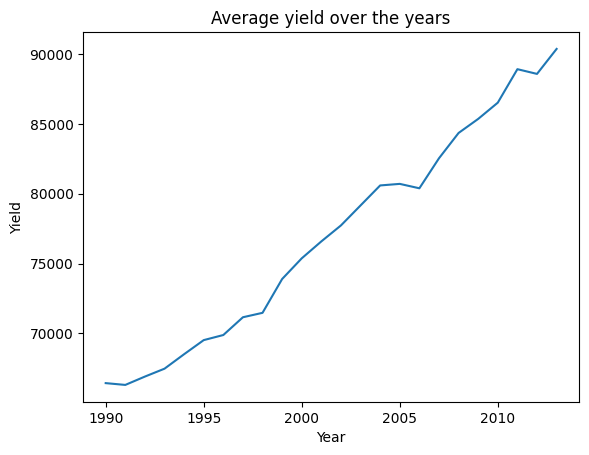

In [162]:
df.groupby(['Year'])['hg/ha_yield'].mean().plot()
plt.title('Average yield over the years')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.show()

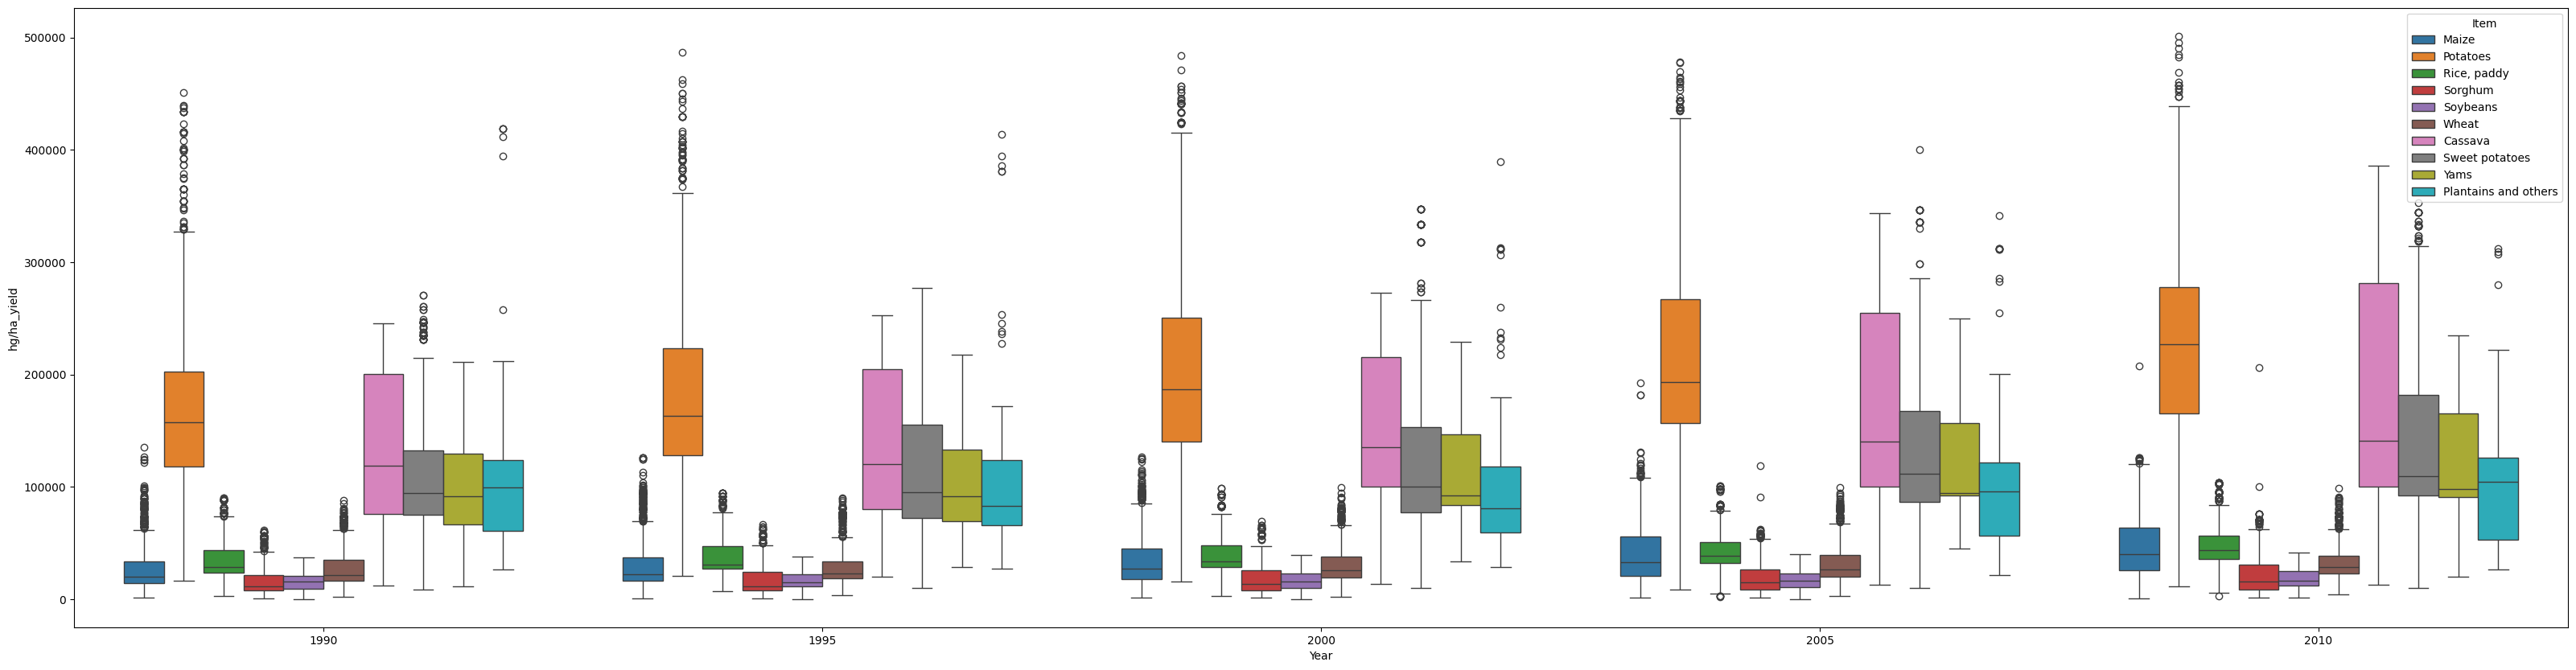

In [163]:
plt.figure(figsize=(40, 10))
df['Year'] = df['Year'].apply(lambda x: int(x/5)*5)
sns.boxplot(data=df[['Year', 'hg/ha_yield', 'Item']],
            x='Year', y='hg/ha_yield', hue='Item')
plt.show()

In [164]:
df.dropna(inplace=True)

In [165]:
X = pd.get_dummies(df, columns=['Area', 'Item'])
X.head()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,36613,1485.0,121.0,16.37,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1990,66667,1485.0,121.0,16.37,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1990,23333,1485.0,121.0,16.37,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1990,12500,1485.0,121.0,16.37,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1990,7000,1485.0,121.0,16.37,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [166]:
X.drop(['Year', 'pesticides_tonnes', 'hg/ha_yield'], axis=1, inplace=True)
X.head()

,average_rain_fall_mm_per_year,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,Area_Austria,Area_Azerbaijan,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,16.37,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1485.0,16.37,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1485.0,16.37,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1485.0,16.37,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1485.0,16.37,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [167]:
Y = df['hg/ha_yield']
Y.head()

0    36613
1    66667
2    23333
3    12500
4     7000
Name: hg/ha_yield, dtype: int64

In [168]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, random_state=42, shuffle=True, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [169]:
estimators = [25, 50, 100, 200, 300]
for estimator in estimators:
    print(f'CV-score for {estimator} estimators: {cross_val_score(
        RandomForestRegressor(n_estimators=estimator, random_state=42), X_train, y_train).mean():.4f}')

CV-score for 25 estimators: 0.9284
CV-score for 50 estimators: 0.9287
CV-score for 100 estimators: 0.9291
CV-score for 200 estimators: 0.9291
CV-score for 300 estimators: 0.9291


In [170]:
model = RandomForestRegressor(n_estimators=25, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

rmse = root_mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f' RMSE: {rmse:.2f}\n MAE: {mae:.3f}\n R-Squared: {r2:.3f}')

 RMSE: 23670.54
 MAE: 11488.982
 R-Squared: 0.923


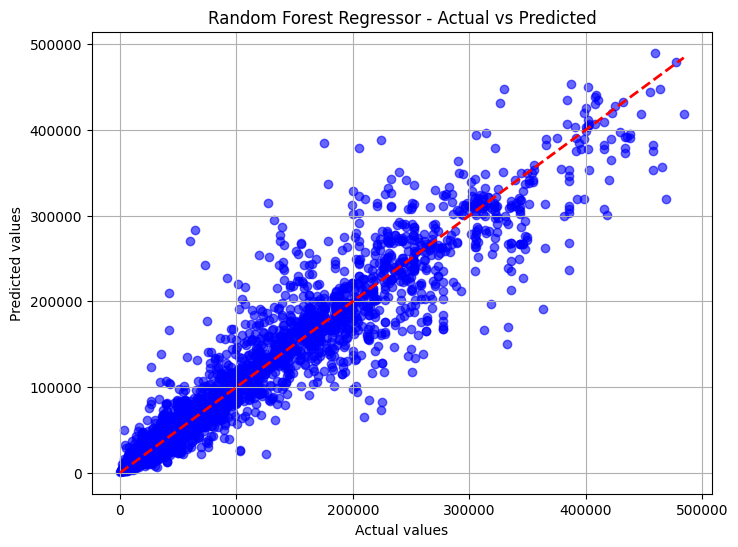

In [171]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test),
         max(y_test)], color='red', lw='2', ls='--')
plt.title(f'Random Forest Regressor - Actual vs Predicted')
plt.xlabel("Actual values")
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()